In [362]:
import csv as csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline 

In [363]:
data = pd.read_csv('gun_violence.csv')

In [364]:
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

In [366]:
data.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [367]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_gun_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_gun_data.head(20)

,Total,Percent
participant_relationship,223903,93.418643
location_description,197588,82.439283
participant_name,122253,51.007397
gun_stolen,99498,41.513370
gun_type,99451,41.493760
n_guns_involved,99451,41.493760
participant_age,92298,38.509327
notes,81017,33.802576
participant_age_group,42119,17.573234
state_house_district,38772,16.176771


In [368]:

from datetime import datetime
data['date'] = pd.to_datetime(data['date'], format = '%Y-%M-%d')

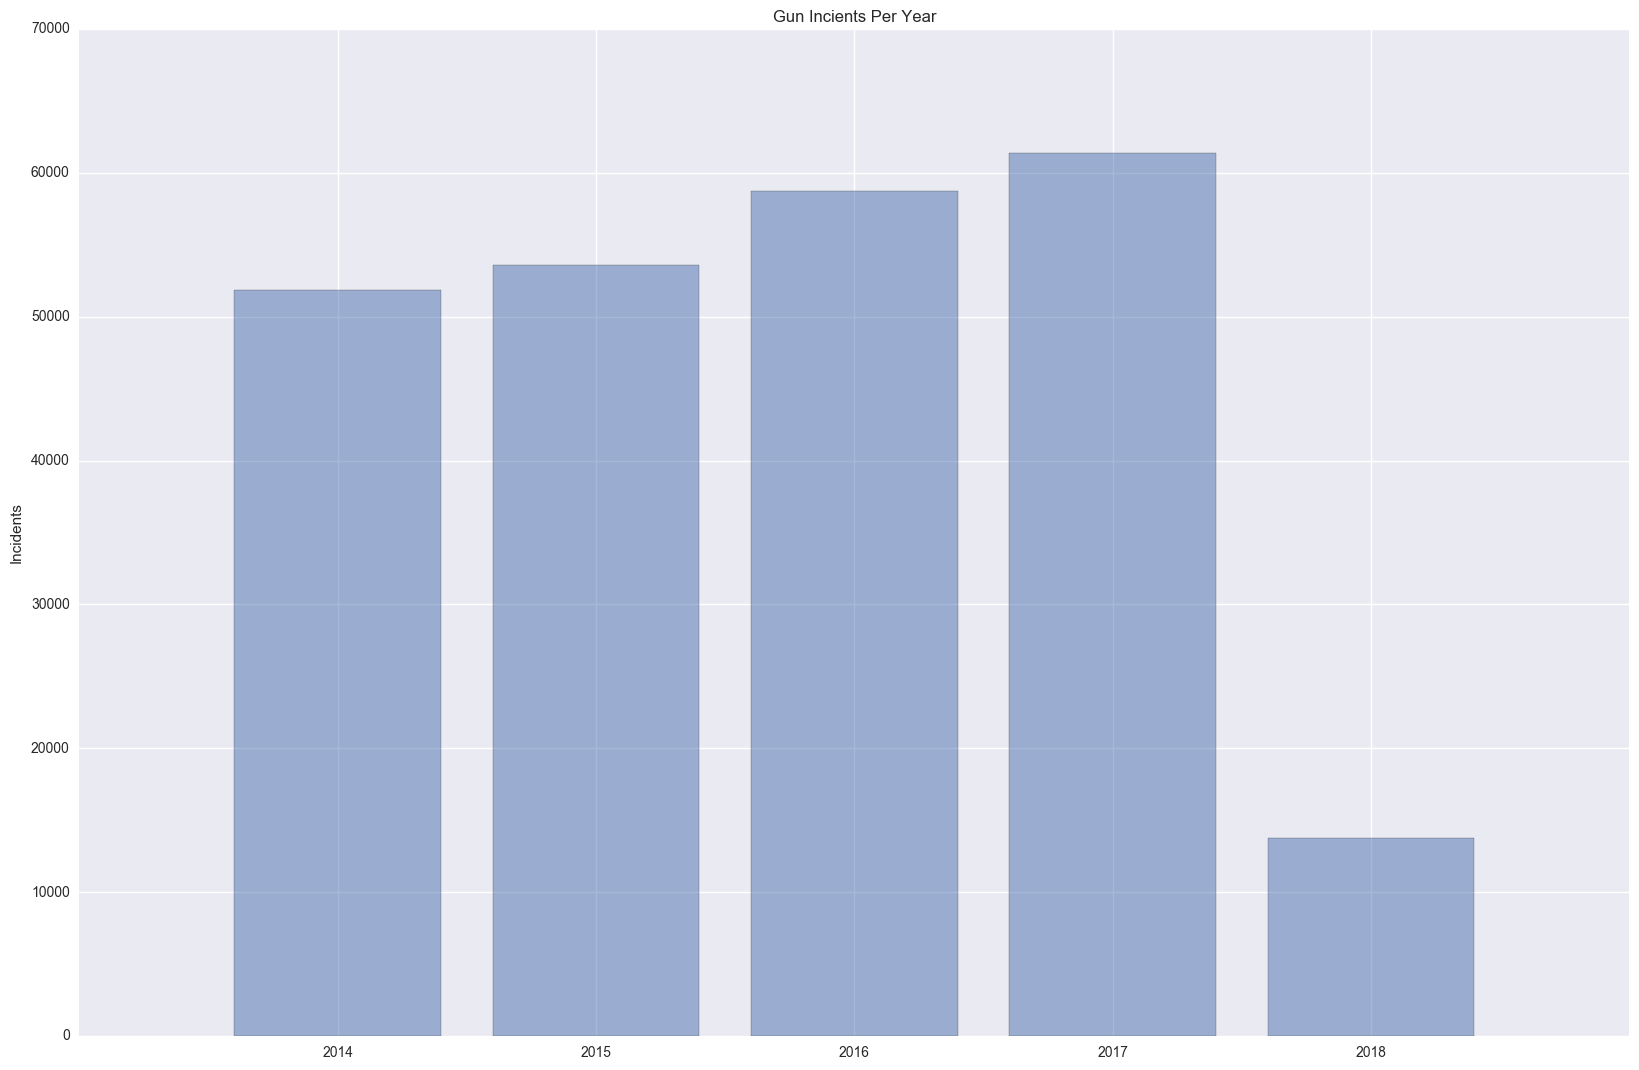

In [413]:
#incidents per year
#2013 was removed
yearly = []
for i in range(2014,2019):
    year = data[data['date'].dt.year == i]
    num = len(year)
    yearly.append(num)

years = ('2014', '2015', '2016', '2017', '2018')
y_pos = np.arange(len(years))
incidents = yearly
 
plt.bar(y_pos, incidents, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Incidents')
plt.title('Gun Incients Per Year')
 
plt.show()

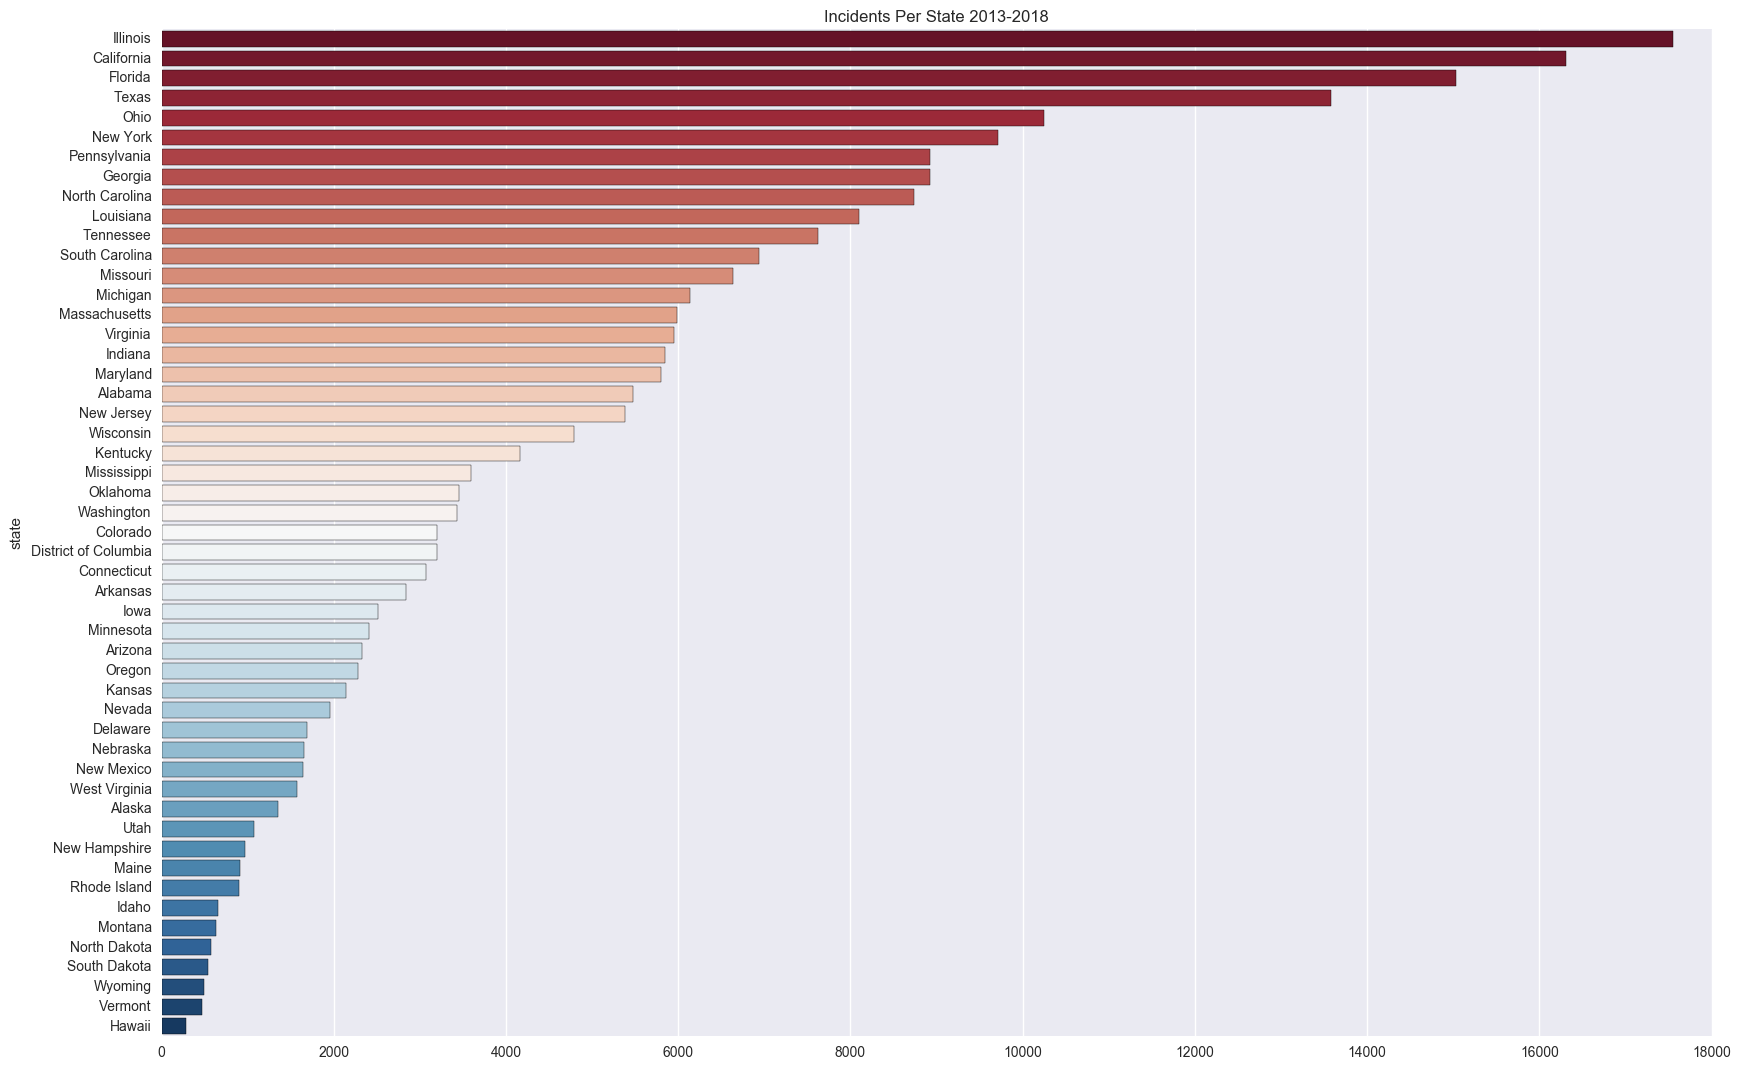

In [397]:
    
#group by state and count incidents
states = data.groupby('state').count()
total = states['incident_id'].sort_values(ascending = False)

#graph number of incidents per state
ax = sns.barplot(x = total.values, y=total.index, palette = 'RdBu')
ax.set_title('Incidents Per State 2013-2018')
sns.set(rc={'figure.figsize':(20,13)})

In [371]:
#read in population data
avg_pop = []
with open('population.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        combo = (row['State'], row['AVG'])
        avg_pop.append(combo)


In [372]:
#incidents per 100k residents per state
state_ratio = []
for i in range(len(avg_pop)):
    per = (states['incident_id'][i] * 100000)/float(avg_pop[i][1])
    combo = (avg_pop[i][0], per)
    state_ratio.append(combo)

In [373]:
headers = ['State','Per100k']
ratio = pd.DataFrame(state_ratio, columns=headers).set_index('State')
ratio = ratio['Per100k']
ratio = ratio.sort_values(ascending = False)


In [374]:
nat_avg = ratio.mean()

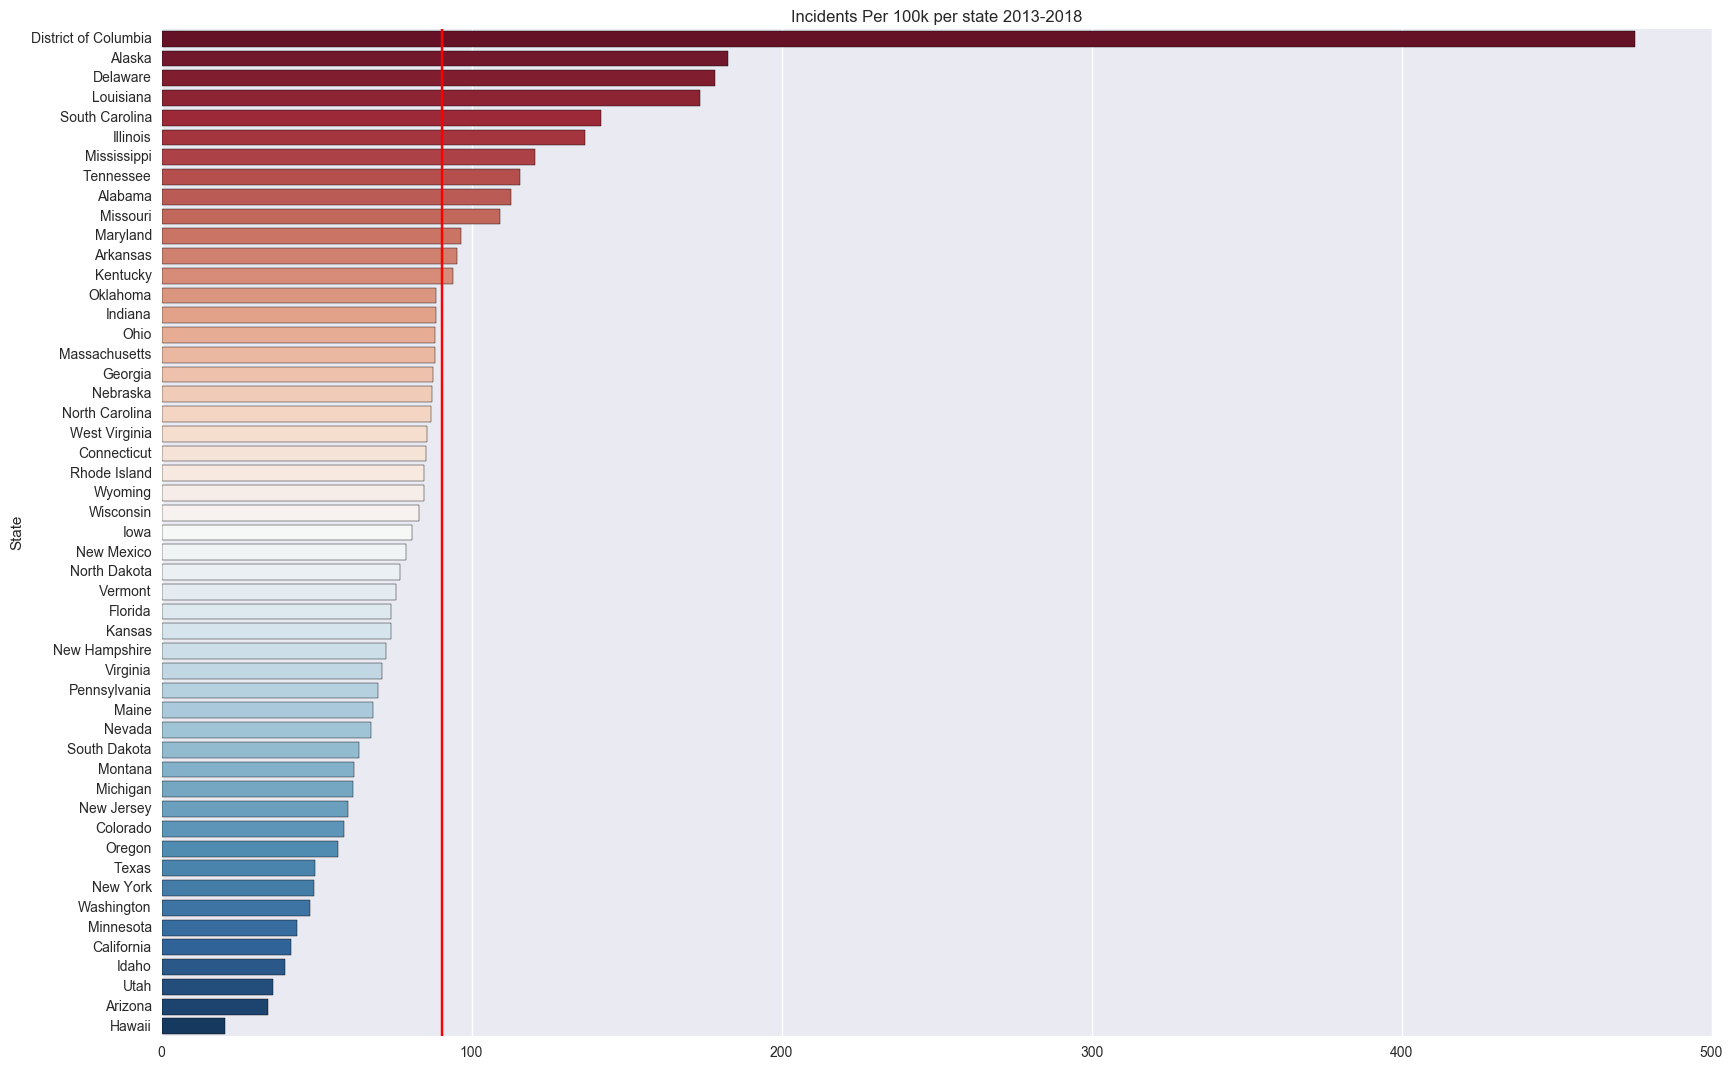

In [375]:
#graph ratio of incidents per 100k people
#with national average
ax = sns.barplot(x = ratio.values, y=ratio.index, palette = 'RdBu')
ax.set_title('Incidents Per 100k per state 2013-2018')
ax.axvline(nat_avg, color = 'r')
sns.set(rc={'figure.figsize':(20,13)})

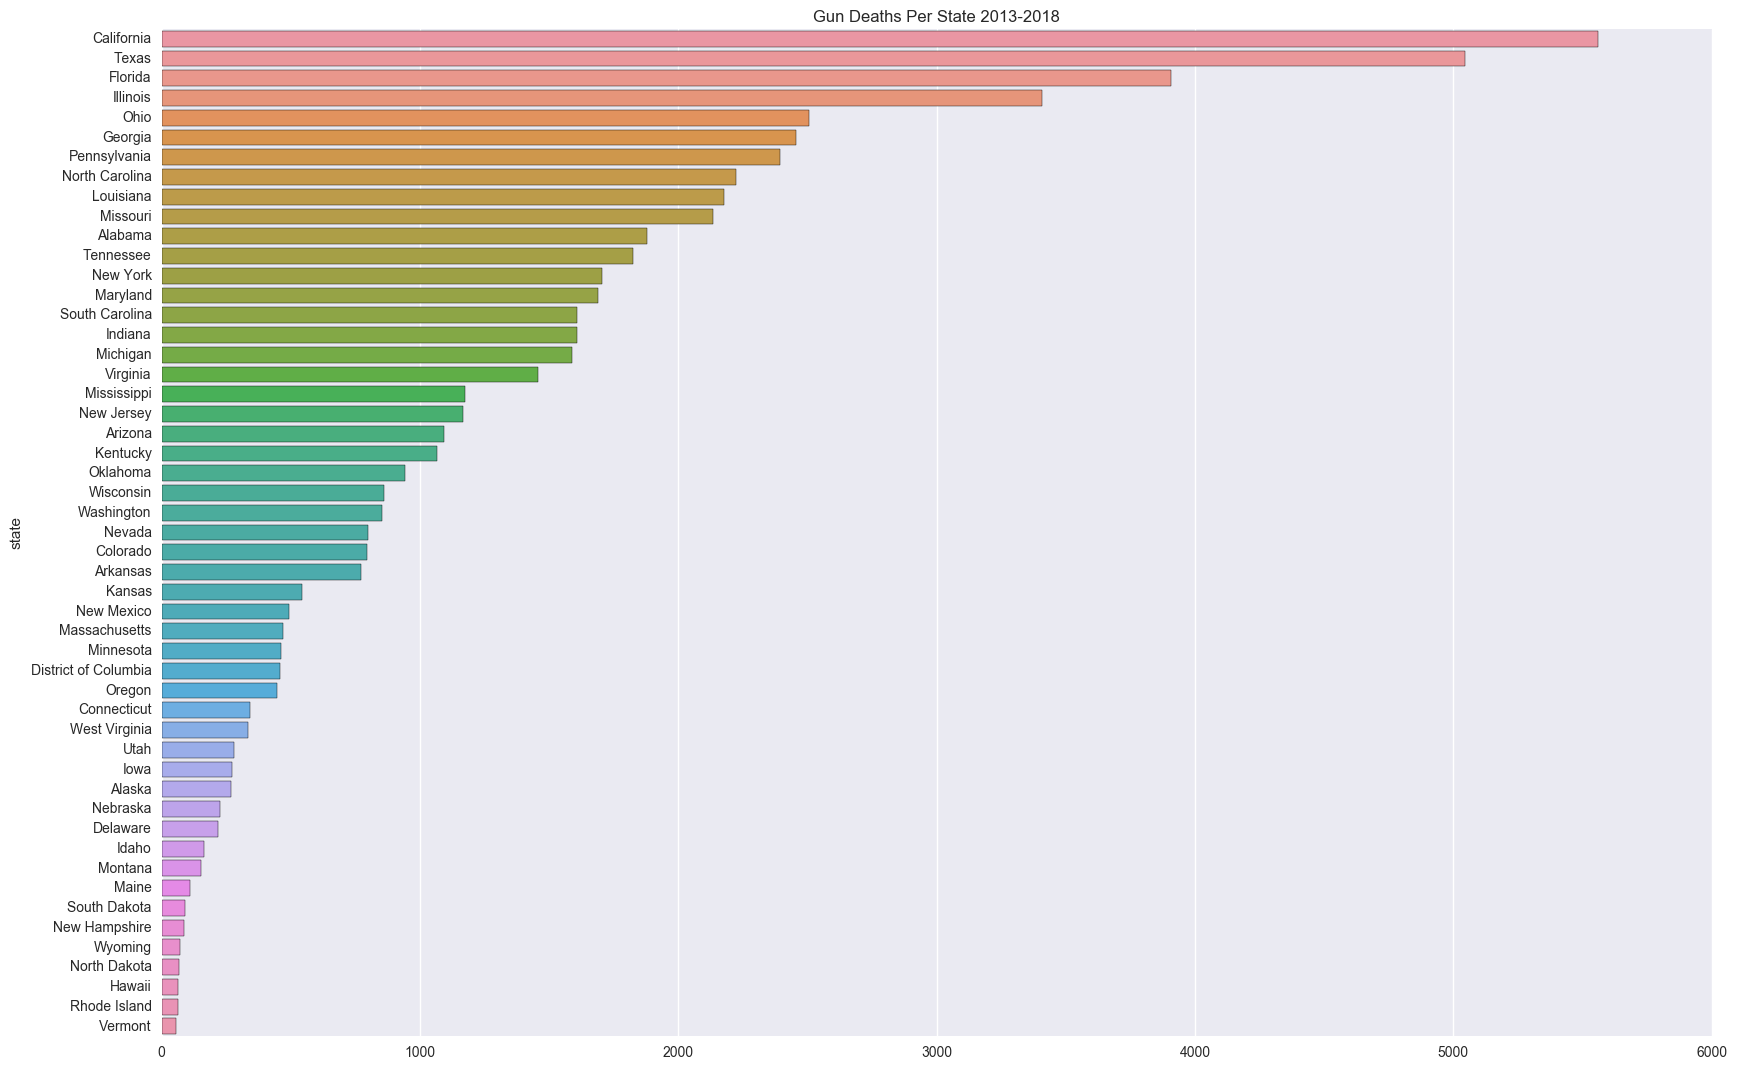

In [454]:
#Number of deaths per state
deaths = data.groupby('state')
d_state = deaths['n_killed'].sum()
d_state = d_state.sort_values(ascending = False)

#graph number of incidents per state
ax = sns.barplot(x = d_state.values, y=d_state.index)
ax.set_title('Gun Deaths Per State 2013-2018')
sns.set(rc={'figure.figsize':(20,13)})

In [455]:
#deaths per 100k residents per state
deaths = data.groupby('state')
d_state_ratio = deaths['n_killed'].sum()

d_ratio = []
for i in range(len(avg_pop)):
    per = (d_state_ratio[i] * 100000)/float(avg_pop[i][1])
    combo = (avg_pop[i][0], per)
    d_ratio.append(combo)
    
headers = ['State','Per100k']
d_ratio = pd.DataFrame(d_ratio, columns=headers).set_index('State')
d_ratio = d_ratio['Per100k']
d_ratio = d_ratio.sort_values(ascending = False)

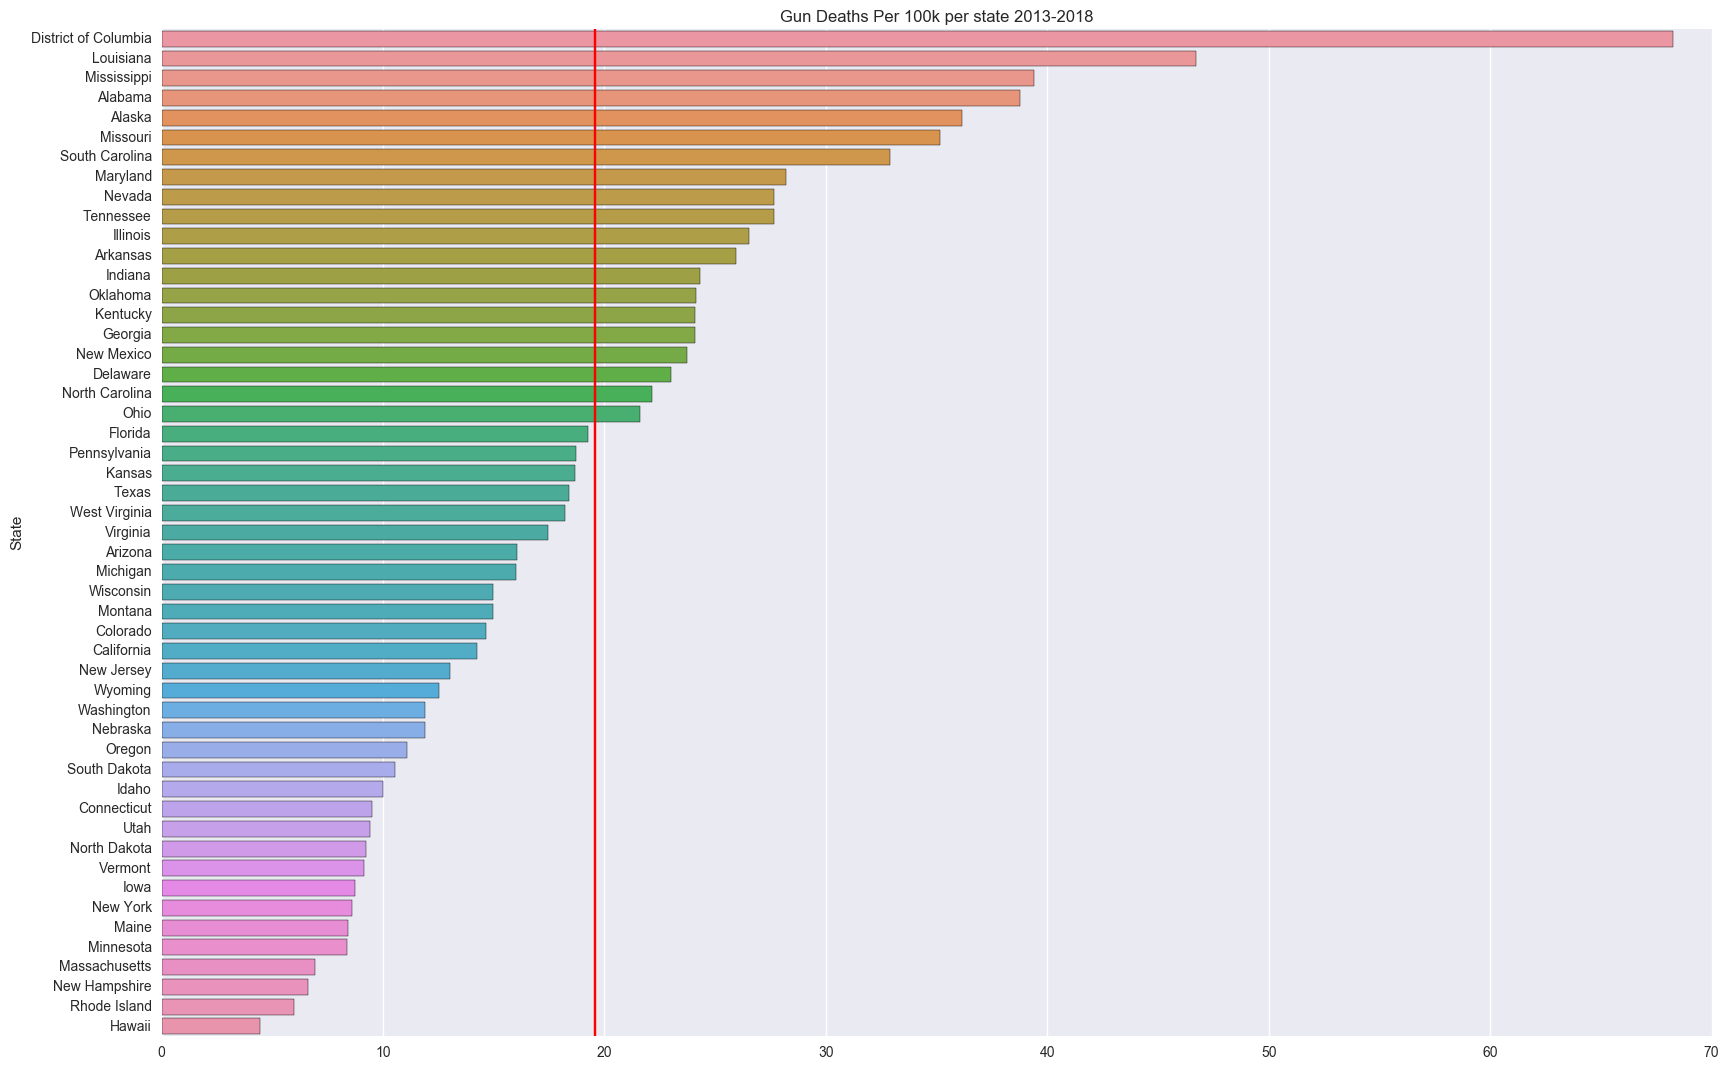

In [457]:
#graph ratio of deaths per 100k people
#with national average
d_avg = d_ratio.mean()
ax = sns.barplot(x = d_ratio.values, y=d_ratio.index)
ax.set_title('Gun Deaths Per 100k per state 2013-2018')
ax.axvline(d_avg, color = 'r')
sns.set(rc={'figure.figsize':(20,13)})

In [512]:
#gun deaths per incident per state
death_incident_ratio = []
for i in range(len(avg_pop)):
    per = float(d_state_ratio[i])/float(states['incident_id'][i])
    combo = (avg_pop[i][0], per)
    death_incident_ratio.append(combo)

headers = ['State','D_I']
death_incident_ratio = pd.DataFrame(death_incident_ratio, columns=headers).set_index('State')
death_incident_ratio = death_incident_ratio['D_I']
death_incident_ratio = death_incident_ratio.sort_values(ascending = False)

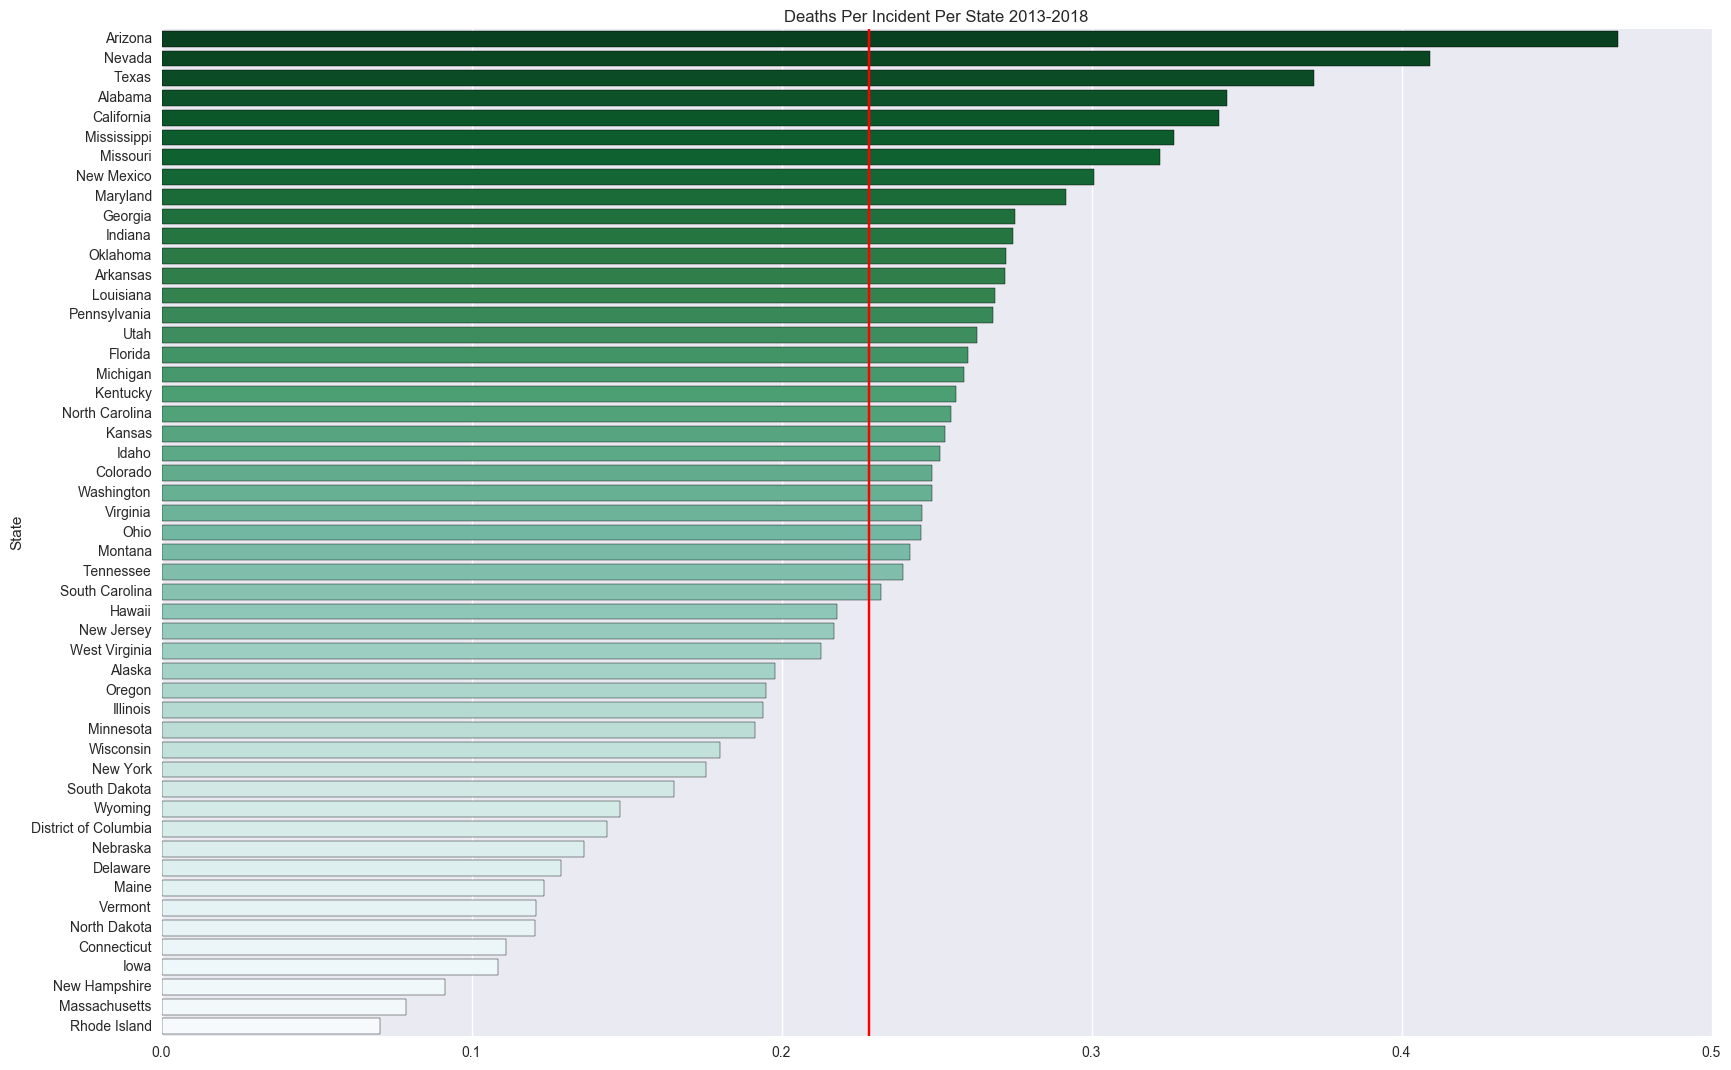

In [513]:
#graph ratio of deaths per incident per state
#with national average
d_i_avg = death_incident_ratio.mean()
ax = sns.barplot(x = death_incident_ratio.values, y=death_incident_ratio.index, palette= 'BuGn_r')
ax.set_title('Deaths Per Incident Per State 2013-2018')
ax.axvline(d_i_avg, color = 'r')
sns.set(rc={'figure.figsize':(20,13)})